# Uppgift 0

In [74]:
import pandas as pd
import seaborn as sns
import hashlib as hl
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append("..")
from data_utils import *
import matplotlib.image as mpimg


df = read_athlete_events("/home/albot/coding/repos/Projekt-OS-Norge/athlete_events.csv")
df = hash_column(df, "Name")
no = df[df["NOC"] == "NOR"]

# Uppgift 1

In [83]:
no_medals = no[no["Medal"].notnull()]
no_medals = no_medals.drop_duplicates(subset=["Event", "Games", "Team", "Medal"])
medal_series = group_medals(no_medals, "Year").sort_values(by="Total", ascending=False)

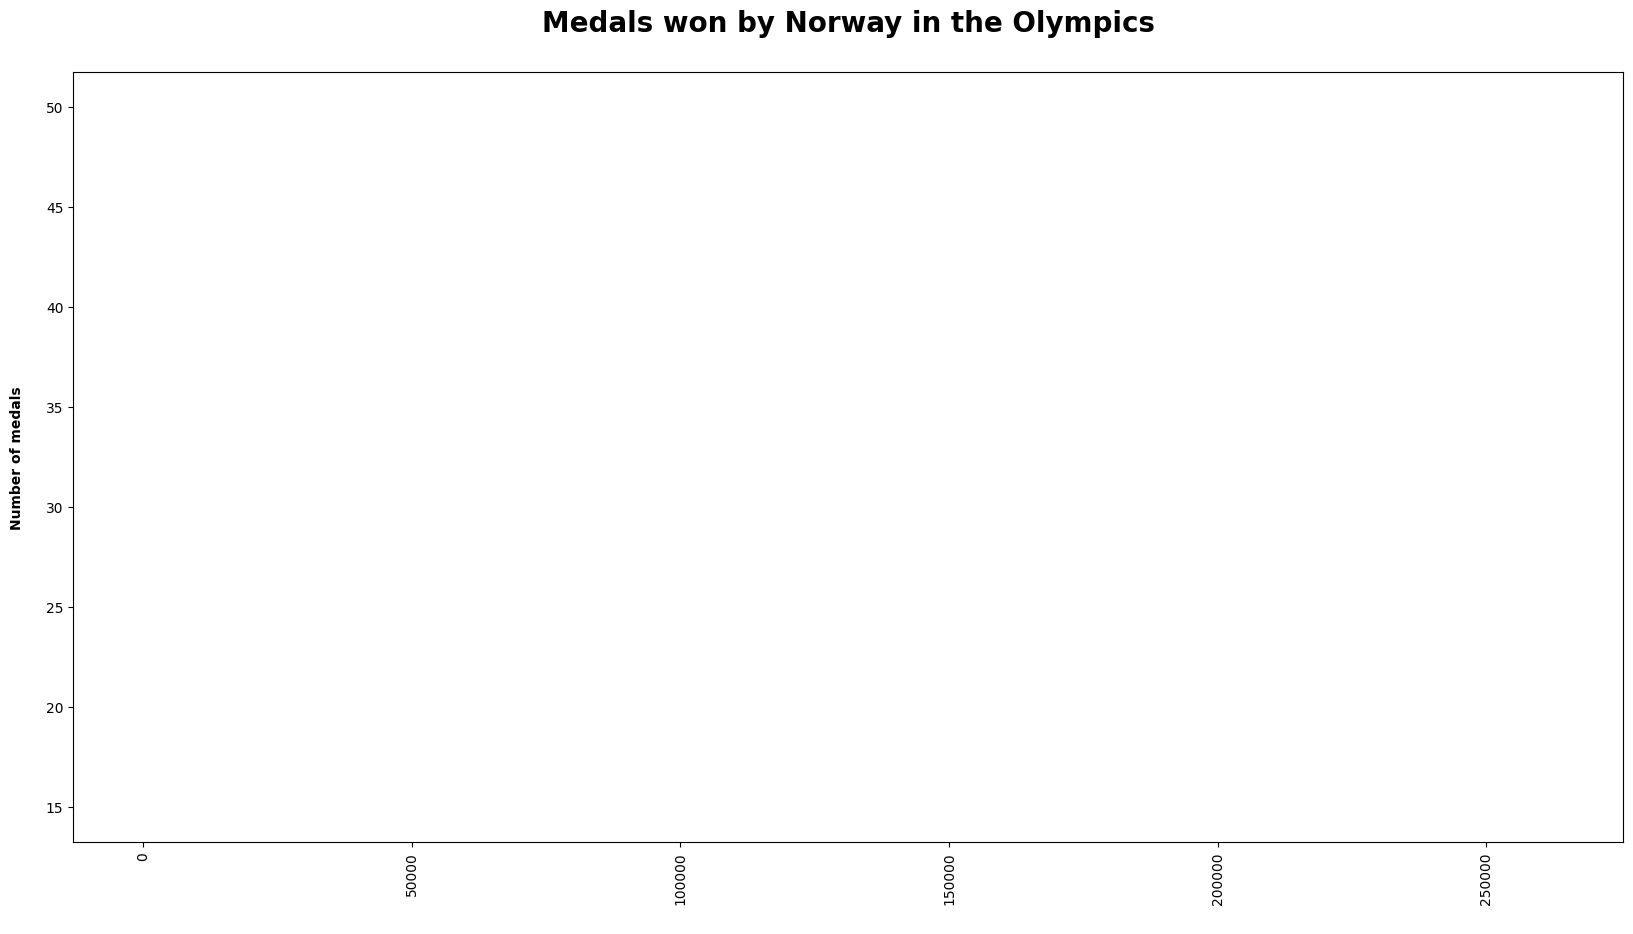

In [76]:
# medals through the ages

bg_image = mpimg.imread('nor.png')
plt.figure(figsize=(20, 10))
# plt.imshow(bg_image, extent=[0, len(no_medals.index) - 1, 0, no_medals.index.max()], aspect='auto', zorder=-1, alpha=0.5)
sns.lineplot(data=no_medals, x=no_medals.index, y=no_medals.columns[3], marker="o", color="white", linewidth=3)
# sns.lineplot(data=no_medals)
plt.title("Medals won by Norway in the Olympics\n", fontweight="bold", fontsize=20)
plt.xlabel(" ")
plt.ylabel("Number of medals\n", fontweight="bold")
plt.xticks(rotation=90)
plt.show()

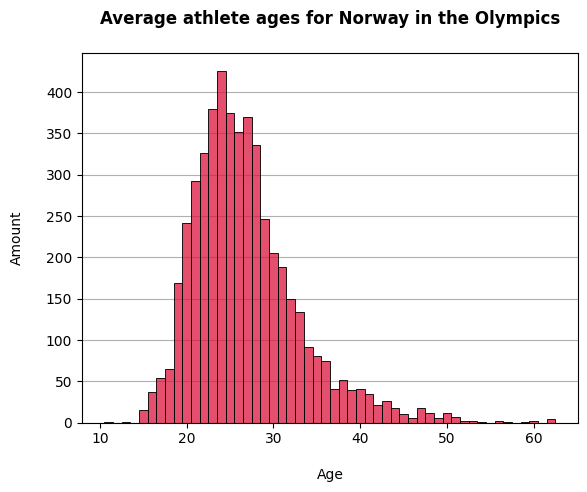

In [77]:
# ages through the ages

sns.histplot(data=no, x="Age", color="crimson", discrete=True, zorder=2)
plt.title("Average athlete ages for Norway in the Olympics\n", fontweight="bold")
plt.xlabel("\nAge")
plt.ylabel("Amount\n")
plt.grid(axis="y", zorder=1)
plt.show()

## Gender distribution  

### Perhaps  
* age  
* medals  
* px subplot pie chart of women w/ medals vs women participating, same for men  
* sns barplot (countplot?) of women particiapting through the years
* best sports

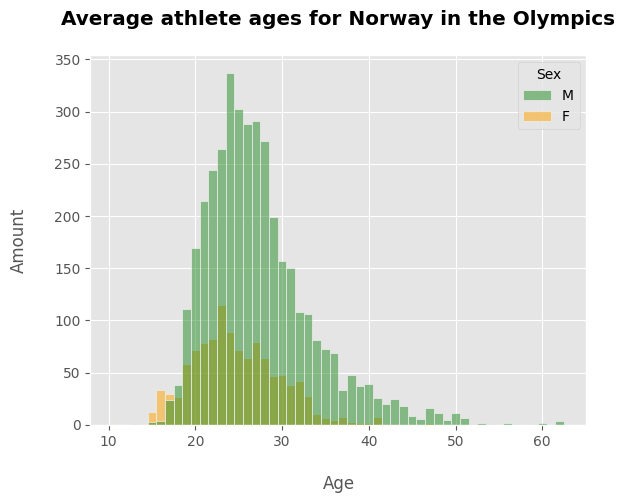

In [84]:
no_fem = no[no["Sex"] == "F"]
no_man = no[no["Sex"] == "M"]
label_color = {"M": "forestgreen", "F": "orange"}

sns.histplot(data=no, x="Age", discrete=True, hue="Sex", palette=label_color)
plt.title("Average athlete ages for Norway in the Olympics\n", fontweight="bold")
plt.xlabel("\nAge")
plt.ylabel("Amount\n")
plt.grid(axis="y", zorder=1)
plt.show()

In [79]:
# Philip
# no = df[df["NOC"] == "NOR"]
# no_medals = no[no["Medal"].notnull()]
# no_medals = no_medals.drop_duplicates(subset=["Event", "Games", "Team", "Medal"])
# no_medals = no_medals[no_medals["Games"] == "1920 Summer"]
# no_medals.info()
# display(no_medals)

Verification needed to see if above code gives a better result. 

## Verification samples

1908 Summer: 8 medaljer {"Gold": 2, "Silver": 3, "Bronze": 3}

58 competitors  
58 men  
0 women  
23 events  
7 sports  

1920 Summer: 31 medaljer {"Gold": 13, "Silver": 9, "Bronze": 9}

194 competitors  
188 men  
6 women  
72 events  
16 sports  

1936 Summer: 6 medaljer

70 competitors  
68 men  
2 women  
43 events  
12 sports  

1964 Summer: 0 medaljer

26 competitors  
24 men  
2 women  
23 events  
6 sports  

1992 Summer: 7 medaljer {"Gold": 2, "Silver": 4, "Bronze": 1}

83 competitors  
51 men  
32 women  
64 events  
17 sports  

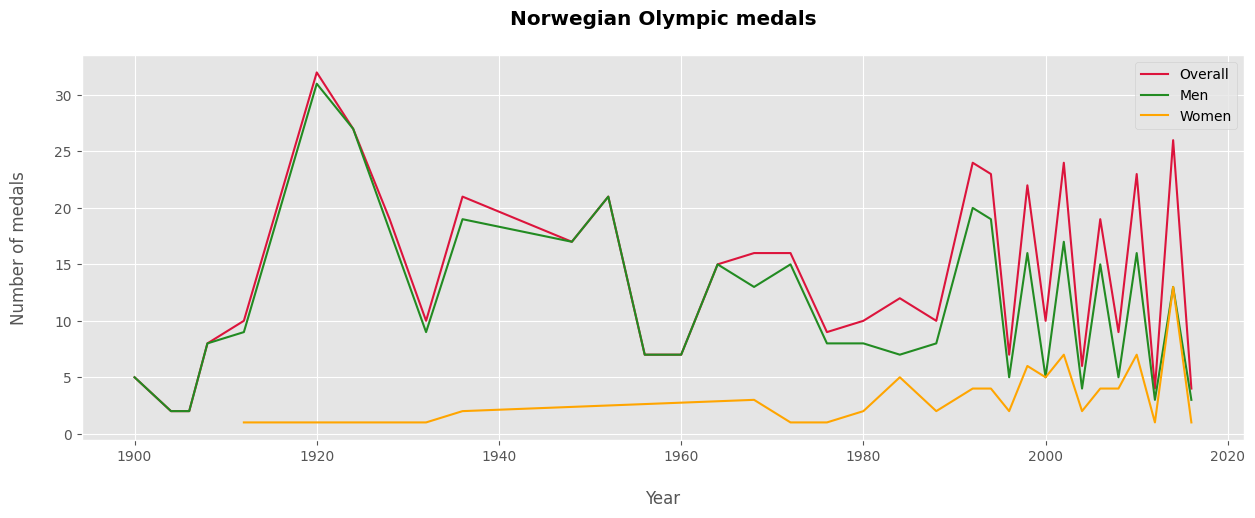

In [ ]:
medal_count_all = group_medals(no_medals, "Year").sort_values(by="Year")
medal_count_wom = no_medals[no_medals["Sex"] == "F"]
medal_count_wom = group_medals(medal_count_wom, "Year").sort_values(by="Year")
medal_count_men = no_medals[no_medals["Sex"] == "M"]
medal_count_men = group_medals(medal_count_men, "Year").sort_values(by="Year")
medal_count_men.columns[3]
plt.style.use("ggplot")
plt.figure(figsize=(15, 5))
label_color = {"M": "forestgreen", "F": "orange"}
sns.lineplot(data=medal_count_all, x="Year", y=medal_count_all.columns[3], label="Overall", color="crimson")
sns.lineplot(data=medal_count_men, x="Year", y=medal_count_men.columns[3], label="Men", color="Forestgreen")
sns.lineplot(data=medal_count_wom, x="Year", y=medal_count_wom.columns[3], label="Women", color="orange")
plt.title("Norwegian Olympic medals\n", fontweight="bold")
plt.ylabel("Number of medals\n")
plt.xlabel("\nYear")
plt.legend()
plt.show()

# if all else is correct then Men is not, it follows the overlaps with the overall line when women is not zero which is not possible

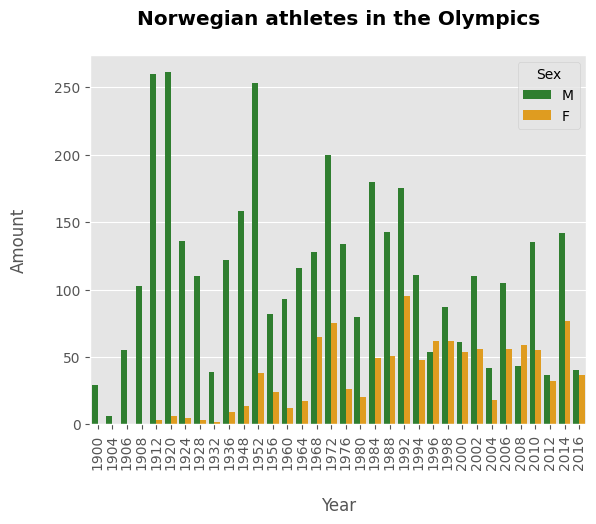

In [82]:
no_genders = no.groupby(["Year","Sex"]).count().reset_index()
label_color = {"M": "forestgreen", "F": "orange"}
sns.barplot(data=no_genders,x="Year", y="ID", hue="Sex", palette=label_color)
plt.title("Norwegian athletes in the Olympics\n", fontweight="bold")
plt.ylabel("Amount\n")
plt.xlabel("\nYear")
plt.xticks(rotation=90)
plt.show()

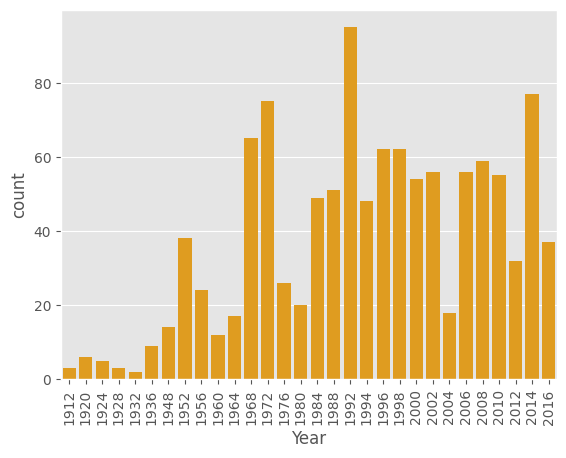

In [88]:
no_women = no[no["Sex"] == "F"]
no_women = no_women[["Year", "Sex"]]
plt.style.use("ggplot")
sns.countplot(data=no_women, x="Year", color="orange")
plt.xticks(rotation=90)
plt.show()


In [ ]:
# percentage of women over time

